# Portfolio Agents Assignment
**Student Name:** [Your Name]  
**Date:** [Date]  

---

## Assignment Overview
This notebook implements a multi-agent LLM system for generating personalized investment portfolios.

**Pipeline Overview:**
1. Data Collection (ETFs, market data)
2. User Profile Definition
3. Multi-Agent Portfolio Generation
4. Backtesting & Evaluation

### Understanding Risk Tolerance & Portfolio Composition

Before starting, review this resource on how risk tolerance shapes portfolio construction:

> **📚 Recommended Reading:** [Investopedia – Risk Tolerance and Asset Allocation](https://www.investopedia.com/articles/investing/062714/100-minus-your-age-outdated.asp)
>
> This guide explains how age, time horizon, and risk appetite determine the mix of stocks, bonds, and alternative assets in a portfolio. Key takeaways:
> - **Aggressive (high risk tolerance):** Heavy equity weighting (80-100% stocks), growth-oriented ETFs, sector bets in tech/innovation, higher volatility accepted for higher potential returns.
> - **Moderate (medium risk tolerance):** Balanced mix (50-70% stocks, 30-50% bonds), diversified across sectors, some dividend/income focus.
> - **Conservative (low risk tolerance):** Bond-heavy (60-80% bonds/fixed income), blue-chip dividend stocks, minimal sector concentration, capital preservation focus.
>
> Additional resources:
> - [Vanguard – Principles for Investing Success](https://investor.vanguard.com/investor-resources-education/education/model-portfolio-allocation)
> - [Fidelity – How to Diversify Your Portfolio](https://www.fidelity.com/learning-center/investment-products/mutual-funds/diversification)
> - [SEC – Beginners' Guide to Asset Allocation](https://www.sec.gov/investor/pubs/assetallocation.htm)

## Overall Homework Goal:

In this assignment, you will build an end-to-end pipeline of LLM agents that creates personalized investment portfolios based on user profiles. Your system will leverage the OpenAI Chat Completions API to create specialized agents that collaborate to analyze market data, assess user risk tolerance, and recommend ETF portfolios tailored to individual interests and financial situations. 

---
## Setup & Imports

In [ ]:
# Install required packages (run once)
# !pip install openai yfinance pandas numpy matplotlib seaborn

In [1]:
import os
import json
from datetime import datetime, timedelta
from typing import Dict, List, Tuple

# Data & Analysis
import pandas as pd
import numpy as np
import yfinance as yf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# LLM API
from openai import OpenAI

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

ModuleNotFoundError: No module named 'openai'

In [ ]:
# API Key Setup
# IMPORTANT: Do NOT hardcode your API key here!
# Set it as an environment variable: export OPENAI_API_KEY='your-key'

import os
os.environ['OPENAI_API_KEY'] = "enter your key here in quotes"

# Test API connection
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    # i used gpt 5.2 for this assignment. might as well use the best model
    # frontier models will yield best results. feel free to experiment tho
    model="gpt-5.2",
    # you can replace this with any prompt you'd like to test
    input="hi my name's anagha"
)

print(response.output_text)

---
## Part 1: Data Collection & Preparation

**Goal:** Collect historical data for diverse ETFs across sectors.

In [ ]:
# Define ETF universe
# TODO:A dd a couple more ETFs for all categories. do some research!

ETF_UNIVERSE = {
    'Technology': ['XLK', 'VGT', 'QQQ'],
    'Healthcare': ['XLV', 'VHT', 'IBB'],
    'Energy': ['XLE', 'VDE', 'IXC'],
    'Financial': ['XLF', 'VFH', 'KBE'],
    'Real Estate': ['VNQ', 'IYR', 'XLRE'],
    'Consumer': ['XLY', 'VCR', 'XLP'],
    'Industrials': ['XLI', 'VIS', 'IYJ'],
    'Bonds': ['BND', 'AGG', 'TLT'],
    'International': ['VXUS', 'VEA', 'VWO'],
    'ESG/Sustainable': ['ESGU', 'ESGV', 'SUSL'],
}

# Flatten to single list
all_etfs = [etf for sector_etfs in ETF_UNIVERSE.values() for etf in sector_etfs]
print(f"Total ETFs to analyze: {len(all_etfs)}")
print(f"Sectors covered: {list(ETF_UNIVERSE.keys())}")

In [ ]:
def fetch_etf_data(tickers: List[str], period: str = '2y') -> pd.DataFrame:
    """
    Fetch historical price data for given ETFs.
    
    Args:
        tickers: List of ETF ticker symbols
        period: Time period (e.g., '1y', '2y', '5y')
    
    Returns:
        DataFrame with adjusted close prices
    """
    # TODO: Implement data fetching using yfinance
    # Hint: Use yf.download(tickers, period=period)['Adj Close']
    pass

# Fetch data
price_data = fetch_etf_data(all_etfs)
print(f"Data shape: {price_data.shape}")
print(f"Date range: {price_data.index.min()} to {price_data.index.max()}")
price_data.head()

In [ ]:
def calculate_etf_metrics(price_data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate key metrics for each ETF.
    
    Metrics to calculate:
    - Total return
    - Historical returns
    - Volatility (std of returns)
    - Sharpe ratio (assuming risk-free rate of 3%)
    - Max drawdown
    - ...feel free to add more metrics if you want. make sure you calc all ones above tho
    """
    metrics = {}
    
    # TODO: Calculate metrics for each ETF
    # Hint: Use pct_change() for returns, std() for volatility
    
    return pd.DataFrame(metrics).T

etf_metrics = calculate_etf_metrics(price_data)
etf_metrics.head(10)

In [ ]:
def get_etf_news(tickers: List[str]):
    """
    Get 5-10 news titles for each ETF.
    why do we use titles? 
    1. news summaries/articles are probs blocked by paywall
    2. news titles are v descriptive --> act like good header summaries
    
    Metrics to calculate:
    - Extract news titles from yfinance news output

    Returns:
        Data structure of choice that stores the ETF and corresponding news titles.
    """
    metrics = {}
    
    # TODO: Retrieve and store etf news headers
    
    pass

etf_news = get_etf_news(all_etfs)
etf_news.head(10)

In [ ]:
# Visualize ETF characteristics
# TODO: Create a risk-return scatter plot for one ETF from your list
# x-axis: volatility, y-axis: return, color by sector

plt.figure(figsize=(14, 8))
# Your visualization code here
plt.title('...') #fill out
plt.xlabel('Volatility (Annualized Std Dev)')
plt.ylabel('Annualized Return')
plt.show()

### Part 1 Analysis

**TODO:** Write a brief summary of the data:
- Which sectors performed best?
- Which ETFs have the best risk-adjusted returns?
- Any interesting patterns?
- Thinking ahead: how can you perform sentiment analysis for news articles via LLMs? Would the best approach be to just feed in all the news summaries or provide specific prompts?

---
## Part 2: User Profile Collection

**Goal:** Define structured user profiles for testing.

In [ ]:
# Define user profile structure
USER_PROFILES = {
    'young_aggressive': {
        'name': 'Alex (Young Professional)',
        'age': 28,
        'investment_amount': 5000,
        'investment_horizon': '30+ years',
        'risk_tolerance': 'aggressive',
        'interests': ['technology', 'innovation', 'growth'],
        'goals': 'long-term wealth accumulation',
        'income_stability': 'high',
        'existing_portfolio': None
    },
    
    'middle_moderate': {
        'name': 'Jamie (Mid-Career)',
        'age': 45,
        'investment_amount': 10000,
        'investment_horizon': '15-20 years',
        'risk_tolerance': 'moderate',
        'interests': ['balanced growth', 'sustainability', 'dividend income'],
        'goals': 'retirement preparation with some growth',
        'income_stability': 'moderate',
        'existing_portfolio': 'some stocks and bonds'
    },
    
    # TODO: Add at least one more profile different from above 2 (for example., near-retirement conservative)
    # you might have to do some more research
}

# Display profiles
for profile_id, profile in USER_PROFILES.items():
    print(f"\n{'='*60}")
    print(f"Profile: {profile['name']}")
    print(f"{'='*60}")
    for key, value in profile.items():
        if key != 'name':
            print(f"  {key}: {value}")

---
## Part 3: Multi-Agent LLM Pipeline

**Goal:** Build specialized agents that collaborate to create portfolios.

**What is prompting? Use Google Scholar or web of science to find some interesting prompting papers and techniques!**

In [ ]:
def call_llm(messages: List[Dict], model: str = "gpt-5.2", temperature: float = 0.7) -> str:
    """
    Helper function to call OpenAI API.
    
    Args:
        messages: List of message dicts with 'role' and 'content'
        model: Model name
        temperature: Sampling temperature
    
    Returns:
        Response content as string

        TODO: Look at parameters and return type. make sure you understand how to use this function to call the API in your pipeline.
        Also look at the parameters used in the API call (model, temperature, max_tokens).
        You can experiment with different models and parameter settings to see how it affects the output. 
    """
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=temperature,
            max_tokens=1000
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error calling LLM: {e}")
        return None

### Agent 1: Market Analyst

**Research about what system and user prompts to an LLM are. 
Try coming with a prompt by yourself (no AI input). Run and retrieve results.
Then, try asking an LLM to refine your prompt. Run and retrieve results.
Are there any differences?**

In [ ]:
def market_analyst_agent(etf_metrics: pd.DataFrame, sector_data: Dict) -> str:
    """
    Analyzes current market trends and sector performance.
    
    TODO: Implement this agent with effective prompting
    
    Prompt should:
    - Give the agent a clear role as a market analyst
    - Provide relevant market data (top/bottom performers, sector trends, news, use the Part 1 functions)
    - Ask for structured output (sector recommendations, outlook)
    - Encourage data-driven analysis
    
    Returns:
        Market analysis report as string
    """
    
    # Prepare market data summary
    # TODO: Extract key statistics from etf_metrics
    
    system_prompt = """
    replace with your system prompt for the market analyst agent. this should set the context and instructions for the agent's analysis. be specific about the role of the agent and the type of insights you want it to generate.
    """
    
    user_prompt = f"""
    replace with your prompt for the market analyst agent. make sure to include the data you want to provide to the agent and the specific instructions for analysis.
    """
    
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]
    
    return call_llm(messages)

# Test the agent
market_analysis = market_analyst_agent(etf_metrics, ETF_UNIVERSE)
print("\n=== MARKET ANALYST OUTPUT ===")
print(market_analysis)

### Agent 2: Risk Assessment Agent

In [ ]:
def risk_assessment_agent(user_profile: Dict) -> str:
    """
    Assesses user risk tolerance and provides allocation guidelines.
    
    TODO: Implement this agent
    
    Prompt should:
    - Position agent as a financial advisor/risk specialist
    - Take user profile as input
    - Output risk assessment and allocation guidelines (% stocks, bonds, etc.)
    - Consider age, horizon, risk tolerance, goals
    
    Returns:
        Risk assessment report as string
    """
    
    # TODO: Implement this agent
    

    system_prompt = """
    replace with your system prompt for the risk assessment agent. this should set the context and instructions for the agent's analysis. be specific about the role of the agent and the type of insights you want it to generate.
    """
    
    user_prompt = f"""
    replace with your prompt for the risk assessment agent. make sure to include the user profile data and the specific instructions for the risk assessment and allocation guidelines you want the agent to provide.
    """
    
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]
    
    return call_llm(messages)

# Test the agent, change the user profile to test different outputs
risk_assessment = risk_assessment_agent(USER_PROFILES['young_aggressive'])
risk_assessment2 = risk_assessment_agent(USER_PROFILES['_____ replace with your profile id _____']) # test with your other profile too
print("\n=== RISK ASSESSMENT OUTPUT ===")
print(risk_assessment)
print("\n=== RISK ASSESSMENT OUTPUT 2 ===")
print(risk_assessment2)


### Agent 3: Portfolio Construction Agent

**IMPORTANT:** Given a user profile, the resulting LLM generated portfolio should be a dictionary, where keys are stock tickers and values are the % allocated for each stock. It is very important that your result follows this form, as our backtesting evaluation tool will assume this data structure when parsing.

Example: 
```
'person1': {
        # ~95% equity, ~5% bonds → should PASS very aggressive
        'QQQ': 30, 'XLK': 25, 'VGT': 15, 'IBB': 10, 'VWO': 10, 'ESGU': 5, 'BND': 5
    }
```

In [ ]:
def portfolio_construction_agent(
    user_profile: Dict,
    market_analysis: str,
    risk_assessment: str,
    available_etfs: Dict[str, List[str]]
) -> str:
    """
    Creates final portfolio recommendations based on all inputs.
    
    TODO: Implement this agent
    
    Prompt should:
    - Position agent as portfolio manager
    - Synthesize inputs from previous agents
    - Output specific ETF recommendations with allocation %
    - Ensure allocations sum to 100%
    - Consider asking for JSON output for easier parsing
    
    Returns:
        Portfolio recommendations (ideally as JSON string)
    """
    
    # TODO: Implement this agent
    pass

# Test the agent
portfolio_recommendation = portfolio_construction_agent(
    USER_PROFILES['young_aggressive'],
    market_analysis,
    risk_assessment,
    ETF_UNIVERSE
)
print("\n=== PORTFOLIO CONSTRUCTION OUTPUT ===")
print(portfolio_recommendation)

### Complete Pipeline Function

In [ ]:
def generate_portfolio(user_profile: Dict, etf_metrics: pd.DataFrame) -> Dict:
    """
    Complete pipeline to generate a portfolio for a user.
    
    Args:
        user_profile: User profile dictionary
        etf_metrics: DataFrame with ETF performance metrics
    
    Returns:
        Dictionary with portfolio recommendations and intermediate outputs
    """
    print(f"\nGenerating portfolio for: {user_profile['name']}")
    print("="*60)
    
    # Step 1: Market Analysis
    print("\n[1/3] Running Market Analyst...")
    market_analysis = market_analyst_agent(etf_metrics, ETF_UNIVERSE)
    
    # Step 2: Risk Assessment
    print("[2/3] Running Risk Assessment...")
    risk_assessment = risk_assessment_agent(user_profile)
    
    # Step 3: Portfolio Construction
    print("[3/3] Running Portfolio Construction...")
    portfolio = portfolio_construction_agent(
        user_profile, market_analysis, risk_assessment, ETF_UNIVERSE
    )
    
    print("\n✓ Portfolio generation complete!")
    
    return {
        'user_profile': user_profile,
        'market_analysis': market_analysis,
        'risk_assessment': risk_assessment,
        'portfolio': portfolio
    }

# Test on one profile
result_portfolio = generate_portfolio(USER_PROFILES['young_aggressive'], etf_metrics)
result_portfolio2 = generate_portfolio(USER_PROFILES['_____ replace with your profile id _____'], etf_metrics) # test with your other profile too
print("\n=== FINAL PORTFOLIO RECOMMENDATION ===")
print(result_portfolio)
print("\n=== FINAL PORTFOLIO RECOMMENDATION 2 ===")
print(result_portfolio2)

---
## Conclusion & Reflection

**TODO:** Write a final reflection (850-1000 words) addressing the following:

1. **Key Learnings:**
   - What did you learn about multi-agent LLM systems?
   - What strategies did you use for each agent?

2. **Strengths & Weaknesses:**
   - What did the LLM agents do well?
   - Where did they struggle or hallucinate?
   - If you used LLMs for refining prompts, how did the output differ from a human written prompt vs. an AI written one? What was your process for prompt engineering these?

3. **Real-World Applicability:**
   - Would you trust these recommendations for real money?
   - What safeguards would be needed for production use?
   - How well do the agents work together?
   - For all 3 user profiles, how did the resulting portfolios differ. Were the outputs reasonable? How can they be improved?

4. **Future Improvements:**
   - What would make this system more robust?
   - What additional agents or features would help?

**Submit your results as a pdf in addition to this notebook.**

---
## Part 5: Portfolio Evaluation Testing Suite

**Goal:** Validate that your LLM agent pipeline produces sensible portfolios for different risk profiles by backtesting against historical market data.

This testing suite will:
1. Define a set of **example investor profiles** spanning aggressive → conservative risk tolerances
2. Run each profile through your `generate_portfolio` pipeline
3. **Backtest** each resulting portfolio against real historical stock data
4. **Evaluate** whether portfolio performance characteristics (return, volatility, drawdown, Sharpe ratio) align with the stated risk tolerance
5. Produce a **pass/fail diagnostic** and advice summary for each profile

> **How it works:** The evaluation compares *expected* portfolio behavior (based on the risk profile) against *actual* backtested metrics. An aggressive portfolio should have higher returns AND higher volatility than a conservative one. If your agents recommend a high-volatility portfolio to a conservative retiree, the test will flag it.

### Example Investor Profiles for Evaluation

These profiles cover a spectrum of risk tolerances. Your agent pipeline should produce meaningfully different portfolios for each.

In [ ]:
# ============================================================
# Example Investor Profiles for Evaluation Testing
# ============================================================
# These profiles span the full risk-tolerance spectrum.
# Your pipeline should produce portfolios that match each profile's risk level.

EVAL_PROFILES = {
    'ultra_aggressive': {
        'name': 'Priya (Tech Entrepreneur)',
        'age': 24,
        'investment_amount': 50000,
        'investment_horizon': '35+ years',
        'risk_tolerance': 'very aggressive',
        'interests': ['cryptocurrency-adjacent', 'disruptive tech', 'high-growth startups', 'AI'],
        'goals': 'maximize long-term growth, comfortable with large short-term losses',
        'income_stability': 'high but variable',
        'existing_portfolio': None
    },
    'aggressive': {
        'name': 'Marcus (Software Engineer)',
        'age': 30,
        'investment_amount': 25000,
        'investment_horizon': '25-30 years',
        'risk_tolerance': 'aggressive',
        'interests': ['technology', 'innovation', 'international markets'],
        'goals': 'long-term wealth accumulation, early retirement target',
        'income_stability': 'high',
        'existing_portfolio': 'small crypto holdings'
    },
    'moderate_aggressive': {
        'name': 'Sana (Marketing Director)',
        'age': 35,
        'investment_amount': 30000,
        'investment_horizon': '20-25 years',
        'risk_tolerance': 'moderately aggressive',
        'interests': ['growth', 'ESG/sustainable investing', 'healthcare'],
        'goals': 'grow wealth while aligning with values',
        'income_stability': 'high',
        'existing_portfolio': 'employer 401k with index funds'
    },
    'moderate': {
        'name': 'David (Teacher)',
        'age': 42,
        'investment_amount': 15000,
        'investment_horizon': '15-20 years',
        'risk_tolerance': 'moderate',
        'interests': ['balanced growth', 'dividend income', 'real estate'],
        'goals': 'steady growth for retirement and kids college fund',
        'income_stability': 'stable',
        'existing_portfolio': 'pension plan, some savings bonds'
    },
    'moderate_conservative': {
        'name': 'Linda (Small Business Owner)',
        'age': 52,
        'investment_amount': 40000,
        'investment_horizon': '10-15 years',
        'risk_tolerance': 'moderately conservative',
        'interests': ['income generation', 'capital preservation', 'bonds'],
        'goals': 'protect savings, generate supplemental income for retirement',
        'income_stability': 'moderate but variable',
        'existing_portfolio': 'mix of CDs and money market funds'
    },
    'conservative': {
        'name': 'Robert (Near Retirement)',
        'age': 62,
        'investment_amount': 100000,
        'investment_horizon': '5-10 years',
        'risk_tolerance': 'conservative',
        'interests': ['capital preservation', 'fixed income', 'low volatility'],
        'goals': 'preserve capital, generate steady income in retirement',
        'income_stability': 'moderate, approaching fixed income',
        'existing_portfolio': 'government bonds, savings accounts'
    },
    'ultra_conservative': {
        'name': 'Eleanor (Retiree)',
        'age': 72,
        'investment_amount': 80000,
        'investment_horizon': '3-5 years',
        'risk_tolerance': 'very conservative',
        'interests': ['capital preservation', 'inflation protection', 'income'],
        'goals': 'do not lose principal, keep pace with inflation, generate income',
        'income_stability': 'fixed (social security + pension)',
        'existing_portfolio': 'treasury bonds, CDs'
    }
}

# Display all evaluation profiles
print(f"{'='*70}")
print(f"  EVALUATION TEST PROFILES ({len(EVAL_PROFILES)} profiles)")
print(f"{'='*70}")
for pid, p in EVAL_PROFILES.items():
    print(f"\n  [{pid.upper()}] {p['name']}")
    print(f"    Age: {p['age']} | Risk: {p['risk_tolerance']} | Horizon: {p['investment_horizon']}")
    print(f"    Investment: ${p['investment_amount']:,} | Goal: {p['goals']}")

  EVALUATION TEST PROFILES (7 profiles)

  [ULTRA_AGGRESSIVE] Priya (Tech Entrepreneur)
    Age: 24 | Risk: very aggressive | Horizon: 35+ years
    Investment: $50,000 | Goal: maximize long-term growth, comfortable with large short-term losses

  [AGGRESSIVE] Marcus (Software Engineer)
    Age: 30 | Risk: aggressive | Horizon: 25-30 years
    Investment: $25,000 | Goal: long-term wealth accumulation, early retirement target

  [MODERATE_AGGRESSIVE] Sana (Marketing Director)
    Age: 35 | Risk: moderately aggressive | Horizon: 20-25 years
    Investment: $30,000 | Goal: grow wealth while aligning with values

  [MODERATE] David (Teacher)
    Age: 42 | Risk: moderate | Horizon: 15-20 years
    Investment: $15,000 | Goal: steady growth for retirement and kids college fund

  [MODERATE_CONSERVATIVE] Linda (Small Business Owner)
    Age: 52 | Risk: moderately conservative | Horizon: 10-15 years
    Investment: $40,000 | Goal: protect savings, generate supplemental income for retirement

  

### Backtesting Evaluation Engine

The evaluation engine below will:
1. Run your `generate_portfolio` pipeline on each evaluation profile
2. Parse the resulting allocations
3. Backtest against historical price data
4. Score each portfolio on whether its risk/return characteristics match the investor's stated risk tolerance
5. Produce a **pass/fail verdict** with detailed advice

In [ ]:
# ============================================================
# Backtesting Evaluation Engine
# ============================================================
# This cell is SELF-CONTAINED — it defines parse_portfolio_allocation,
# backtest_portfolio, and the evaluation logic so you can test any portfolio output against historical data.

import yfinance as yf
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple
import json
import re


# ---- Fetch historical price data ----
print("Fetching historical ETF price data (2 years)...")
all_etfs = [etf for sector_etfs in ETF_UNIVERSE.values() for etf in sector_etfs]
price_data = yf.download(all_etfs, period='2y', progress=False)
# Handle multi-level columns from yfinance
if isinstance(price_data.columns, pd.MultiIndex):
    if 'Adj Close' in price_data.columns.get_level_values(0):
        price_data = price_data['Adj Close']
    elif 'Close' in price_data.columns.get_level_values(0):
        price_data = price_data['Close']
price_data = price_data.dropna(how='all')
print(f"✓ Price data loaded: {price_data.shape[0]} days × {price_data.shape[1]} ETFs")
print(f"  Date range: {price_data.index.min().date()} to {price_data.index.max().date()}")

# ---- Risk Tolerance Expectations ----
RISK_EXPECTATIONS = {
    'very aggressive': {
        'min_equity_pct': 85,
        'max_bond_pct': 10,
        'expected_volatility': (0.15, 0.40),
        'expected_return': (0.08, 0.35),
        'max_drawdown_tolerance': -0.45,
        'description': 'Near-100% equities, heavy growth/sector bets, minimal bonds'
    },
    'aggressive': {
        'min_equity_pct': 75,
        'max_bond_pct': 20,
        'expected_volatility': (0.12, 0.30),
        'expected_return': (0.06, 0.25),
        'max_drawdown_tolerance': -0.35,
        'description': 'Equity-heavy with small bond cushion, growth-oriented'
    },
    'moderately aggressive': {
        'min_equity_pct': 65,
        'max_bond_pct': 30,
        'expected_volatility': (0.10, 0.22),
        'expected_return': (0.05, 0.18),
        'max_drawdown_tolerance': -0.28,
        'description': 'Majority equities with moderate diversification'
    },
    'moderate': {
        'min_equity_pct': 40,
        'max_bond_pct': 55,
        'expected_volatility': (0.07, 0.16),
        'expected_return': (0.04, 0.14),
        'max_drawdown_tolerance': -0.20,
        'description': 'Balanced stocks and bonds, diversified sectors'
    },
    'moderately conservative': {
        'min_equity_pct': 25,
        'max_bond_pct': 70,
        'expected_volatility': (0.04, 0.12),
        'expected_return': (0.02, 0.10),
        'max_drawdown_tolerance': -0.15,
        'description': 'Bond-heavy, income-focused, limited equity exposure'
    },
    'conservative': {
        'min_equity_pct': 10,
        'max_bond_pct': 85,
        'expected_volatility': (0.02, 0.09),
        'expected_return': (0.01, 0.07),
        'max_drawdown_tolerance': -0.10,
        'description': 'Mostly bonds/fixed income, capital preservation'
    },
    'very conservative': {
        'min_equity_pct': 0,
        'max_bond_pct': 95,
        'expected_volatility': (0.01, 0.06),
        'expected_return': (0.005, 0.05),
        'max_drawdown_tolerance': -0.07,
        'description': 'Near-100% bonds/cash equivalents, inflation protection only'
    }
}

EQUITY_SECTORS = {'Technology', 'Healthcare', 'Energy', 'Financial', 'Real Estate',
                  'Consumer', 'Industrials', 'International', 'ESG/Sustainable'}
BOND_SECTORS = {'Bonds'}


# ============================================================
# parse_portfolio_allocation — parses LLM agent output into
# a dict of {ticker: allocation_%}
# ============================================================
def parse_portfolio_allocation(portfolio_text: str) -> Dict[str, float]:
    """
    Parse portfolio recommendations from LLM output.
    Tries JSON first, then falls back to regex pattern matching.
    
    Args:
        portfolio_text: Raw output from portfolio construction agent
    
    Returns:
        Dict mapping ETF ticker to allocation percentage (0-100)
    """
    if portfolio_text is None:
        return {}
    
    # --- Attempt 1: Try to extract JSON ---
    try:
        # Look for JSON block in text
        json_match = re.search(r'\{[^{}]*\}', portfolio_text, re.DOTALL)
        if json_match:
            parsed = json.loads(json_match.group())
            # Check if it looks like {ticker: pct} or nested
            allocations = {}
            for key, val in parsed.items():
                if isinstance(val, (int, float)):
                    allocations[key.upper()] = float(val)
                elif isinstance(val, dict) and 'allocation' in val:
                    allocations[key.upper()] = float(val['allocation'])
            if allocations:
                return allocations
    except (json.JSONDecodeError, ValueError):
        pass
    
    # --- Attempt 2: Regex for patterns like "XLK: 25%" or "XLK - 25%" ---
    all_tickers = set(etf for sector in ETF_UNIVERSE.values() for etf in sector)
    allocations = {}
    for ticker in all_tickers:
        pattern = rf'{ticker}\s*[:\-–—]\s*(\d+(?:\.\d+)?)\s*%'
        match = re.search(pattern, portfolio_text, re.IGNORECASE)
        if match:
            allocations[ticker] = float(match.group(1))
    
    return allocations


# ============================================================
# backtest_portfolio — backtests allocations against price_data
# ============================================================
def backtest_portfolio(
    allocations: Dict[str, float],
    price_data: pd.DataFrame,
    initial_investment: float = 100000
) -> Tuple[pd.Series, Dict]:
    """
    Backtest a portfolio allocation on historical data.
    
    Args:
        allocations: Dict of {ticker: allocation_percentage} (0-100)
        price_data: Historical price DataFrame
        initial_investment: Starting portfolio value
    
    Returns:
        Tuple of (portfolio_value_series, metrics_dict)
    """
    # Normalize allocations to weights (sum to 1)
    total = sum(allocations.values())
    if total == 0:
        return pd.Series(dtype=float), {}
    weights = {t: pct / total for t, pct in allocations.items()}
    
    # Filter to tickers we have data for
    available = [t for t in weights if t in price_data.columns]
    if not available:
        return pd.Series(dtype=float), {}
    
    # Re-normalize weights for available tickers
    avail_total = sum(weights[t] for t in available)
    weights = {t: weights[t] / avail_total for t in available}
    
    # Daily returns
    returns = price_data[available].pct_change().dropna()
    
    # Portfolio daily return = weighted sum
    portfolio_returns = sum(returns[t] * w for t, w in weights.items())
    
    # Cumulative portfolio value
    portfolio_value = initial_investment * (1 + portfolio_returns).cumprod()
    
    # Calculate metrics
    trading_days = 252
    total_return = (portfolio_value.iloc[-1] / initial_investment) - 1
    n_days = len(portfolio_returns)
    annualized_return = (1 + total_return) ** (trading_days / n_days) - 1 if n_days > 0 else 0
    volatility = portfolio_returns.std() * np.sqrt(trading_days)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / volatility if volatility > 0 else 0
    
    # Max drawdown
    cummax = portfolio_value.cummax()
    drawdown = (portfolio_value - cummax) / cummax
    max_drawdown = drawdown.min()
    
    metrics = {
        'total_return': total_return,
        'annualized_return': annualized_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
    }
    
    return portfolio_value, metrics


# ============================================================
# classify_allocation & evaluate_portfolio
# ============================================================
def classify_allocation(allocations: Dict[str, float], etf_universe: Dict[str, List[str]]) -> Dict:
    """Classify a portfolio's allocation into equity vs bond percentages."""
    ticker_to_sector = {}
    for sector, tickers in etf_universe.items():
        for t in tickers:
            ticker_to_sector[t] = sector
    
    equity_pct = 0.0
    bond_pct = 0.0
    other_pct = 0.0
    
    for ticker, pct in allocations.items():
        sector = ticker_to_sector.get(ticker, 'Unknown')
        if sector in EQUITY_SECTORS:
            equity_pct += pct
        elif sector in BOND_SECTORS:
            bond_pct += pct
        else:
            other_pct += pct
    
    return {'equity_pct': equity_pct, 'bond_pct': bond_pct, 'other_pct': other_pct}


def evaluate_portfolio(
    profile: Dict,
    allocations: Dict[str, float],
    backtest_metrics: Dict,
    etf_universe: Dict[str, List[str]]
) -> Dict:
    """
    Evaluate whether a portfolio's backtested performance matches the
    investor's risk tolerance expectations.
    """
    risk_level = profile['risk_tolerance'].lower()
    expectations = RISK_EXPECTATIONS.get(risk_level)
    
    if expectations is None:
        for key in RISK_EXPECTATIONS:
            if key in risk_level or risk_level in key:
                expectations = RISK_EXPECTATIONS[key]
                break
    if expectations is None:
        return {'error': f'Unknown risk tolerance: {risk_level}', 'passed': False}
    
    alloc_class = classify_allocation(allocations, etf_universe)
    tests = []
    all_passed = True
    advice = []
    
    # Test 1: Equity allocation
    equity_ok = alloc_class['equity_pct'] >= expectations['min_equity_pct']
    tests.append({'test': 'Equity Allocation', 'expected': f">= {expectations['min_equity_pct']}%",
                  'actual': f"{alloc_class['equity_pct']:.1f}%", 'passed': equity_ok})
    if not equity_ok:
        all_passed = False
        advice.append(f"⚠️ Equity allocation ({alloc_class['equity_pct']:.1f}%) is below the minimum ({expectations['min_equity_pct']}%) for a {risk_level} investor. Increase stock/equity ETF exposure.")
    
    # Test 2: Bond allocation
    bond_ok = alloc_class['bond_pct'] <= expectations['max_bond_pct']
    tests.append({'test': 'Bond Allocation', 'expected': f"<= {expectations['max_bond_pct']}%",
                  'actual': f"{alloc_class['bond_pct']:.1f}%", 'passed': bond_ok})
    if not bond_ok:
        all_passed = False
        advice.append(f"⚠️ Bond allocation ({alloc_class['bond_pct']:.1f}%) exceeds the maximum ({expectations['max_bond_pct']}%) for a {risk_level} investor. Portfolio is too conservative.")
    
    # Test 3: Volatility
    vol = backtest_metrics.get('volatility')
    if vol is not None:
        vol_lo, vol_hi = expectations['expected_volatility']
        vol_ok = vol_lo <= vol <= vol_hi
        tests.append({'test': 'Portfolio Volatility', 'expected': f"{vol_lo:.1%} – {vol_hi:.1%}",
                      'actual': f"{vol:.2%}", 'passed': vol_ok})
        if not vol_ok:
            all_passed = False
            if vol < vol_lo:
                advice.append(f"⚠️ Volatility ({vol:.2%}) too LOW for {risk_level} — portfolio may be too conservative.")
            else:
                advice.append(f"⚠️ Volatility ({vol:.2%}) too HIGH for {risk_level} — reduce volatile holdings.")
    
    # Test 4: Max drawdown
    mdd = backtest_metrics.get('max_drawdown')
    if mdd is not None:
        mdd_ok = mdd >= expectations['max_drawdown_tolerance']
        tests.append({'test': 'Max Drawdown', 'expected': f">= {expectations['max_drawdown_tolerance']:.0%}",
                      'actual': f"{mdd:.2%}", 'passed': mdd_ok})
        if not mdd_ok:
            all_passed = False
            advice.append(f"⚠️ Max drawdown ({mdd:.2%}) exceeds tolerance ({expectations['max_drawdown_tolerance']:.0%}) for {risk_level} investor.")
    
    # Test 5: Allocations sum ~100%
    total_alloc = sum(allocations.values())
    sum_ok = 95 <= total_alloc <= 105
    tests.append({'test': 'Allocations Sum to ~100%', 'expected': '95% – 105%',
                  'actual': f"{total_alloc:.1f}%", 'passed': sum_ok})
    if not sum_ok:
        all_passed = False
        advice.append(f"⚠️ Allocations sum to {total_alloc:.1f}% — should be ~100%.")
    
    # Test 6: Diversification
    n_holdings = len(allocations)
    div_ok = n_holdings >= 3
    tests.append({'test': 'Minimum Diversification', 'expected': '>= 3 holdings',
                  'actual': f"{n_holdings} holdings", 'passed': div_ok})
    if not div_ok:
        all_passed = False
        advice.append(f"⚠️ Only {n_holdings} holding(s) — need at least 3 for diversification.")
    
    # Overall advice
    if all_passed:
        advice.insert(0, f"✅ Portfolio PASSES all criteria for a {risk_level} investor.")
    else:
        n_failed = sum(1 for t in tests if not t['passed'])
        advice.insert(0, f"❌ Portfolio FAILS {n_failed}/{len(tests)} criteria for a {risk_level} investor.")
    
    return {
        'profile_name': profile['name'],
        'risk_tolerance': risk_level,
        'allocation_breakdown': alloc_class,
        'tests': tests,
        'all_passed': all_passed,
        'advice': advice,
        'backtest_metrics': backtest_metrics
    }

print("✓ Evaluation engine ready (parse_portfolio_allocation, backtest_portfolio, evaluate_portfolio defined)")

Fetching historical ETF price data (2 years)...
✓ Price data loaded: 502 days × 30 ETFs
  Date range: 2024-02-14 to 2026-02-13
✓ Evaluation engine ready (parse_portfolio_allocation, backtest_portfolio, evaluate_portfolio defined)


### Run the Evaluation Suite

Run the cell below to evaluate your pipeline against all example profiles. This will:
- Generate a portfolio for each of the 7 evaluation profiles using your LLM agents pipeline
- Backtest each portfolio against historical data
- Score and diagnose each portfolio

#### **You should be passing or be close to passing for all evaluation suite portfolios**

In [ ]:
# ============================================================
# Run Evaluation Suite with STUDENT LLM PIPELINE OUTPUT
# ============================================================



eval_results = {}

print("=" * 70)
print("  PORTFOLIO EVALUATION TESTING SUITE (STUDENT LLM PIPELINE OUTPUT)")
print("=" * 70)
print("  Using student LLM pipeline output to verify the evaluation engine.\n")

for profile_id, profile in EVAL_PROFILES.items():
    print(f"\n{'─'*70}")
    print(f"  Evaluating: {profile['name']} ({profile['risk_tolerance']})")
    print(f"{'─'*70}")
    
    try:
    
        pipeline_result = generate_portfolio(profile, etf_metrics)
        allocations = parse_portfolio_allocation(pipeline_result['portfolio'])
        
        if not allocations:
            raise ValueError(f"No sample allocation defined for profile '{profile_id}' (parsed allocations are empty).")
        
        print(f"  LLM generated allocations: {allocations}")
        
        # Backtest against real historical data
        portfolio_value, metrics = backtest_portfolio(
            allocations, price_data, profile['investment_amount']
        )
        
        # Evaluate
        evaluation = evaluate_portfolio(profile, allocations, metrics, ETF_UNIVERSE)
        evaluation['portfolio_value'] = portfolio_value
        evaluation['allocations'] = allocations
        eval_results[profile_id] = evaluation
        
        # Print summary
        status = "✅ PASS" if evaluation['all_passed'] else "❌ FAIL"
        print(f"\n  Result: {status}")
        for t in evaluation['tests']:
            icon = "✓" if t['passed'] else "✗"
            print(f"    {icon} {t['test']}: expected {t['expected']}, got {t['actual']}")
        
        # Print key metrics
        print(f"\n  Backtest metrics:")
        print(f"    Total return: {metrics['total_return']:.2%}")
        print(f"    Ann. return:  {metrics['annualized_return']:.2%}")
        print(f"    Volatility:   {metrics['volatility']:.2%}")
        print(f"    Sharpe ratio: {metrics['sharpe_ratio']:.2f}")
        print(f"    Max drawdown: {metrics['max_drawdown']:.2%}")
        
    except Exception as e:
        print(f"  ❌ ERROR: {e}")
        import traceback
        traceback.print_exc()
        eval_results[profile_id] = {'error': str(e), 'all_passed': False}

print(f"\n{'='*70}")
n_pass = sum(1 for r in eval_results.values() if r.get('all_passed', False))
n_total = len(EVAL_PROFILES)
print(f"  OVERALL: {n_pass}/{n_total} profiles passed all tests")
print(f"{'='*70}")

  PORTFOLIO EVALUATION TESTING SUITE (DUMMY SAMPLE ALLOCATIONS)
  Using pre-defined sample allocations to verify the evaluation engine.


──────────────────────────────────────────────────────────────────────
  Evaluating: Priya (Tech Entrepreneur) (very aggressive)
──────────────────────────────────────────────────────────────────────
  Sample allocations: {'QQQ': 30, 'XLK': 25, 'VGT': 15, 'IBB': 10, 'VWO': 10, 'ESGU': 5, 'BND': 5}

  Result: ✅ PASS
    ✓ Equity Allocation: expected >= 85%, got 95.0%
    ✓ Bond Allocation: expected <= 10%, got 5.0%
    ✓ Portfolio Volatility: expected 15.0% – 40.0%, got 19.37%
    ✓ Max Drawdown: expected >= -45%, got -21.56%
    ✓ Allocations Sum to ~100%: expected 95% – 105%, got 100.0%
    ✓ Minimum Diversification: expected >= 3 holdings, got 7 holdings

  Backtest metrics:
    Total return: 39.69%
    Ann. return:  18.31%
    Volatility:   19.37%
    Sharpe ratio: 0.79
    Max drawdown: -21.56%

───────────────────────────────────────────────────

In [7]:
# ============================================================
# Detailed Evaluation Results & Advice
# ============================================================

for profile_id, result in eval_results.items():
    print(f"\n{'='*70}")
    print(f"  {result.get('profile_name', profile_id)}")
    print(f"  Risk Tolerance: {result.get('risk_tolerance', 'N/A')}")
    print(f"{'='*70}")
    
    if 'error' in result:
        print(f"  ERROR: {result['error']}")
        continue
    
    # Allocation breakdown
    ab = result.get('allocation_breakdown', {})
    print(f"\n  Allocation Breakdown:")
    print(f"    Equity: {ab.get('equity_pct', 0):.1f}%  |  Bonds: {ab.get('bond_pct', 0):.1f}%  |  Other: {ab.get('other_pct', 0):.1f}%")
    
    # Backtest metrics
    bm = result.get('backtest_metrics', {})
    print(f"\n  Backtest Metrics:")
    for metric, val in bm.items():
        if val is not None:
            if 'return' in metric:
                print(f"    {metric}: {val:.2%}")
            elif 'ratio' in metric:
                print(f"    {metric}: {val:.2f}")
            elif 'drawdown' in metric:
                print(f"    {metric}: {val:.2%}")
            elif 'volatility' in metric:
                print(f"    {metric}: {val:.2%}")
            else:
                print(f"    {metric}: {val}")
    
    # Advice
    print(f"\n  Advice & Diagnosis:")
    for a in result.get('advice', []):
        print(f"    {a}")
    print()


  Priya (Tech Entrepreneur)
  Risk Tolerance: very aggressive

  Allocation Breakdown:
    Equity: 95.0%  |  Bonds: 5.0%  |  Other: 0.0%

  Backtest Metrics:
    total_return: 39.69%
    annualized_return: 18.31%
    volatility: 19.37%
    sharpe_ratio: 0.79
    max_drawdown: -21.56%

  Advice & Diagnosis:
    ✅ Portfolio PASSES all criteria for a very aggressive investor.


  Marcus (Software Engineer)
  Risk Tolerance: aggressive

  Allocation Breakdown:
    Equity: 85.0%  |  Bonds: 15.0%  |  Other: 0.0%

  Backtest Metrics:
    total_return: 34.32%
    annualized_return: 16.00%
    volatility: 16.37%
    sharpe_ratio: 0.79
    max_drawdown: -18.12%

  Advice & Diagnosis:
    ✅ Portfolio PASSES all criteria for a aggressive investor.


  Sana (Marketing Director)
  Risk Tolerance: moderately aggressive

  Allocation Breakdown:
    Equity: 80.0%  |  Bonds: 20.0%  |  Other: 0.0%

  Backtest Metrics:
    total_return: 32.23%
    annualized_return: 15.09%
    volatility: 12.38%
    shar

In [8]:
# ============================================================
# Evaluation Summary Dashboard
# ============================================================

# --- Table: Summary of all profiles ---
summary_rows = []
for pid, result in eval_results.items():
    if 'error' in result:
        summary_rows.append({
            'Profile': pid,
            'Name': EVAL_PROFILES[pid]['name'],
            'Risk Tolerance': EVAL_PROFILES[pid]['risk_tolerance'],
            'Status': '❌ ERROR',
            'Equity %': None,
            'Bond %': None,
            'Ann. Return': None,
            'Volatility': None,
            'Sharpe': None,
            'Max DD': None,
            'Tests Passed': '0/?'
        })
    else:
        ab = result.get('allocation_breakdown', {})
        bm = result.get('backtest_metrics', {})
        tests = result.get('tests', [])
        n_passed = sum(1 for t in tests if t['passed'])
        summary_rows.append({
            'Profile': pid,
            'Name': result['profile_name'],
            'Risk Tolerance': result['risk_tolerance'],
            'Status': '✅ PASS' if result['all_passed'] else '❌ FAIL',
            'Equity %': f"{ab.get('equity_pct', 0):.1f}",
            'Bond %': f"{ab.get('bond_pct', 0):.1f}",
            'Ann. Return': f"{bm.get('annualized_return', 0):.2%}" if bm.get('annualized_return') else 'N/A',
            'Volatility': f"{bm.get('volatility', 0):.2%}" if bm.get('volatility') else 'N/A',
            'Sharpe': f"{bm.get('sharpe_ratio', 0):.2f}" if bm.get('sharpe_ratio') else 'N/A',
            'Max DD': f"{bm.get('max_drawdown', 0):.2%}" if bm.get('max_drawdown') else 'N/A',
            'Tests Passed': f"{n_passed}/{len(tests)}"
        })

summary_df = pd.DataFrame(summary_rows)
print("\n=== EVALUATION SUMMARY TABLE ===\n")
print(summary_df.to_string(index=False))


=== EVALUATION SUMMARY TABLE ===

              Profile                         Name          Risk Tolerance Status Equity % Bond % Ann. Return Volatility Sharpe  Max DD Tests Passed
     ultra_aggressive    Priya (Tech Entrepreneur)         very aggressive ✅ PASS     95.0    5.0      18.31%     19.37%   0.79 -21.56%          6/6
           aggressive   Marcus (Software Engineer)              aggressive ✅ PASS     85.0   15.0      16.00%     16.37%   0.79 -18.12%          6/6
  moderate_aggressive    Sana (Marketing Director)   moderately aggressive ✅ PASS     80.0   20.0      15.09%     12.38%   0.98 -13.66%          6/6
             moderate              David (Teacher)                moderate ✅ PASS     60.0   40.0      12.07%      8.76%   1.04  -9.20%          6/6
moderate_conservative Linda (Small Business Owner) moderately conservative ✅ PASS     40.0   60.0       8.86%      7.15%   0.82  -8.05%          6/6
         conservative     Robert (Near Retirement)            conservat

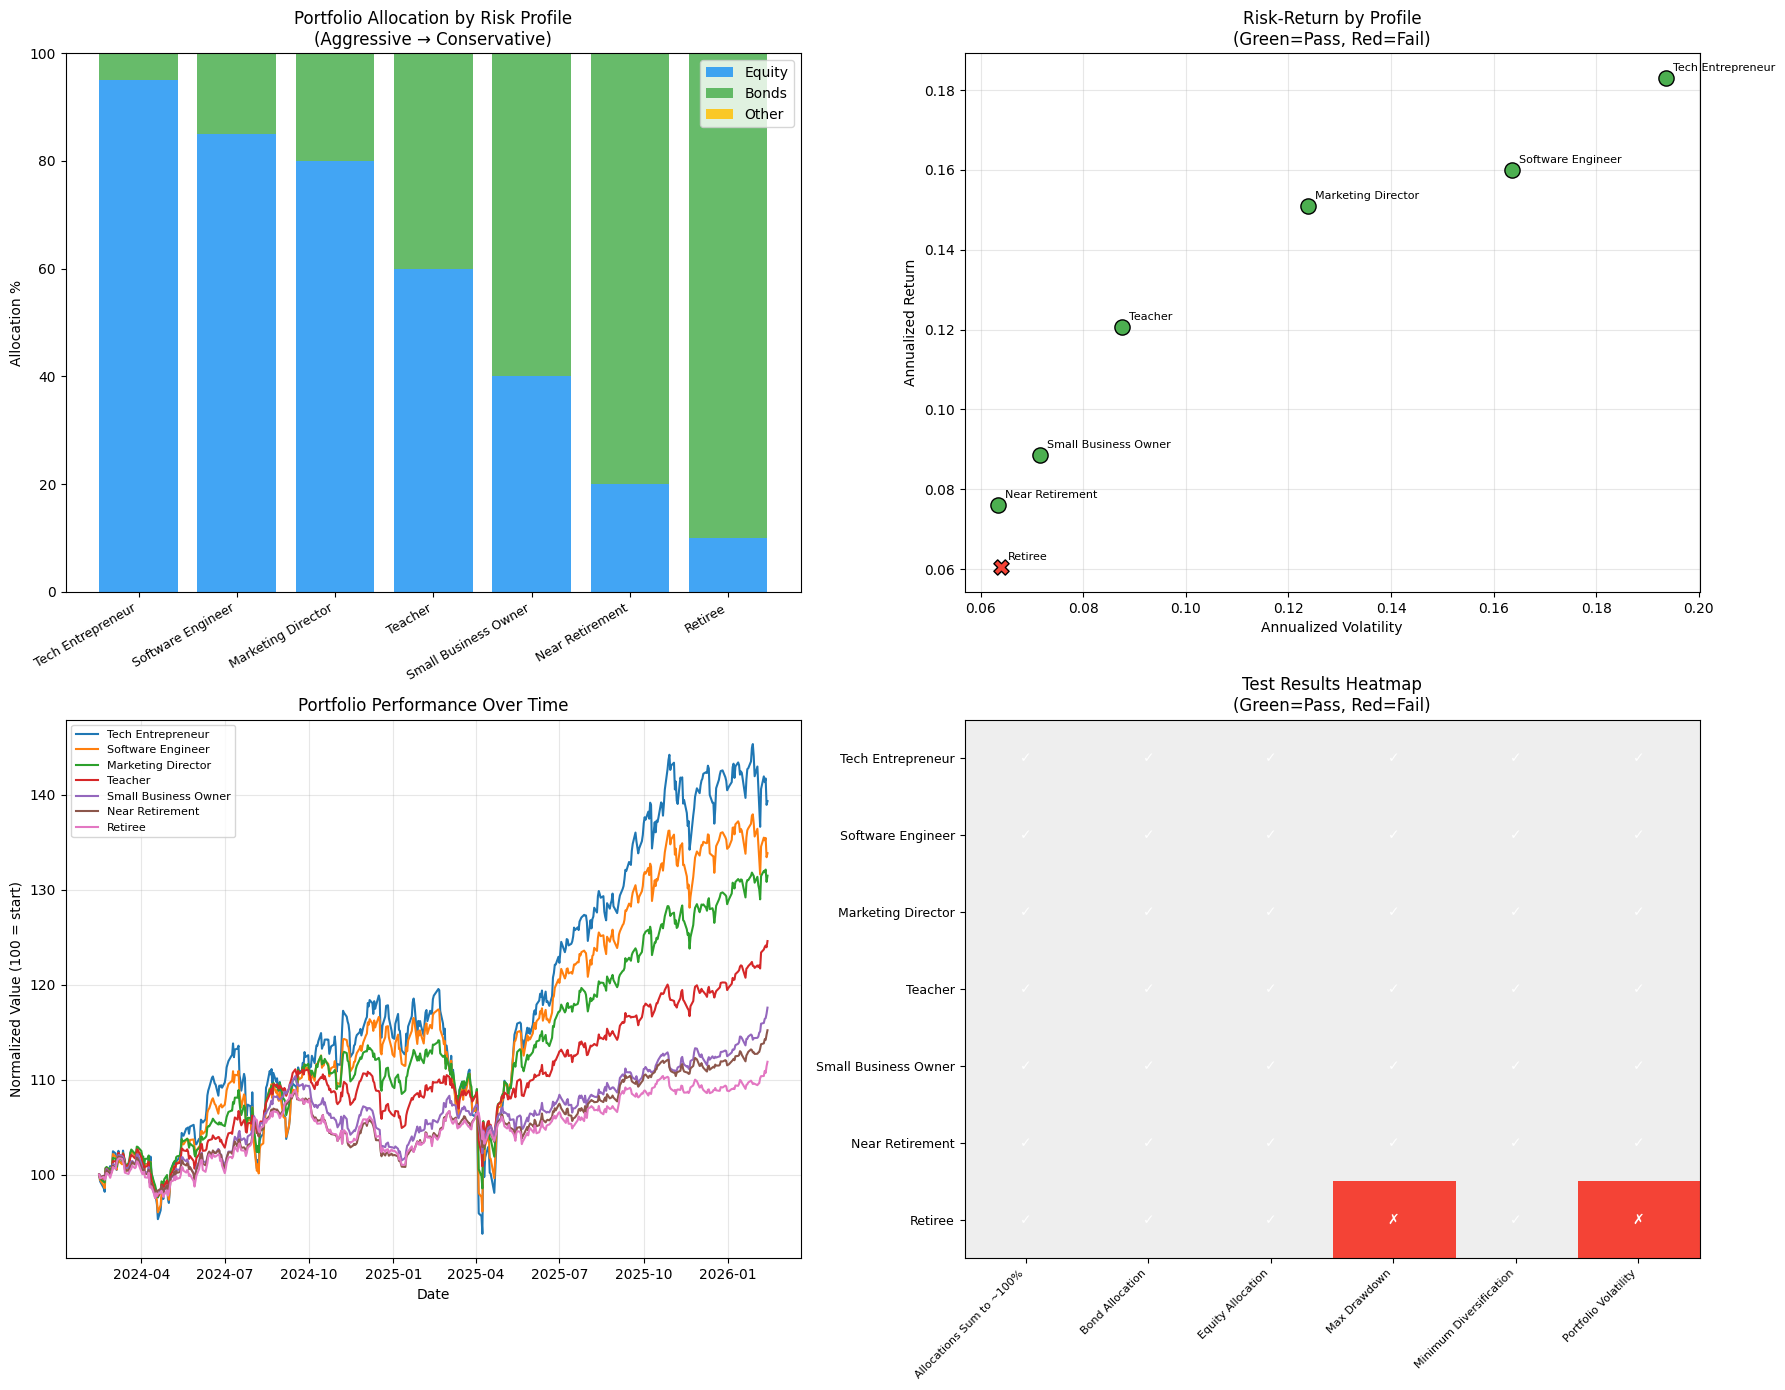

Figure saved to evaluation_results.png


In [9]:
# ============================================================
# Visualization: Evaluation Results
# ============================================================

# Filter out errored profiles for plotting
valid_results = {k: v for k, v in eval_results.items() if 'error' not in v}

if valid_results:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # --- Plot 1: Equity vs Bond allocation by risk level ---
    ax = axes[0, 0]
    risk_order = ['very aggressive', 'aggressive', 'moderately aggressive',
                  'moderate', 'moderately conservative', 'conservative', 'very conservative']
    sorted_results = sorted(valid_results.items(),
                            key=lambda x: risk_order.index(x[1]['risk_tolerance'])
                            if x[1]['risk_tolerance'] in risk_order else 99)
    
    names = [r[1]['profile_name'].split('(')[1].rstrip(')') if '(' in r[1]['profile_name']
             else r[1]['profile_name'] for r in sorted_results]
    equity_pcts = [r[1]['allocation_breakdown']['equity_pct'] for r in sorted_results]
    bond_pcts = [r[1]['allocation_breakdown']['bond_pct'] for r in sorted_results]
    other_pcts = [r[1]['allocation_breakdown'].get('other_pct', 0) for r in sorted_results]
    
    x = np.arange(len(names))
    ax.bar(x, equity_pcts, label='Equity', color='#2196F3', alpha=0.85)
    ax.bar(x, bond_pcts, bottom=equity_pcts, label='Bonds', color='#4CAF50', alpha=0.85)
    ax.bar(x, other_pcts, bottom=[e+b for e, b in zip(equity_pcts, bond_pcts)],
           label='Other', color='#FFC107', alpha=0.85)
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=30, ha='right', fontsize=9)
    ax.set_ylabel('Allocation %')
    ax.set_title('Portfolio Allocation by Risk Profile\n(Aggressive → Conservative)')
    ax.legend()
    ax.axhline(y=100, color='gray', linestyle='--', alpha=0.3)
    
    # --- Plot 2: Risk-Return scatter colored by pass/fail ---
    ax = axes[0, 1]
    for pid, result in valid_results.items():
        bm = result.get('backtest_metrics', {})
        vol = bm.get('volatility')
        ret = bm.get('annualized_return')
        if vol is not None and ret is not None:
            color = '#4CAF50' if result['all_passed'] else '#F44336'
            marker = 'o' if result['all_passed'] else 'X'
            ax.scatter(vol, ret, c=color, marker=marker, s=120, zorder=5, edgecolors='black')
            short_name = result['profile_name'].split('(')[1].rstrip(')') if '(' in result['profile_name'] else pid
            ax.annotate(short_name, (vol, ret), fontsize=8,
                       xytext=(5, 5), textcoords='offset points')
    ax.set_xlabel('Annualized Volatility')
    ax.set_ylabel('Annualized Return')
    ax.set_title('Risk-Return by Profile\n(Green=Pass, Red=Fail)')
    ax.grid(True, alpha=0.3)
    
    # --- Plot 3: Cumulative performance comparison ---
    ax = axes[1, 0]
    for pid, result in valid_results.items():
        pv = result.get('portfolio_value')
        if pv is not None and isinstance(pv, pd.Series) and len(pv) > 0:
            # Normalize to start at 100
            normalized = (pv / pv.iloc[0]) * 100
            label = result['profile_name'].split('(')[1].rstrip(')') if '(' in result['profile_name'] else pid
            ax.plot(normalized.index, normalized.values, label=label, linewidth=1.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Value (100 = start)')
    ax.set_title('Portfolio Performance Over Time')
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # --- Plot 4: Test pass/fail heatmap ---
    ax = axes[1, 1]
    test_names_set = set()
    for r in valid_results.values():
        for t in r.get('tests', []):
            test_names_set.add(t['test'])
    test_names = sorted(test_names_set)
    
    heatmap_data = []
    y_labels = []
    for pid, result in sorted_results:
        short = result['profile_name'].split('(')[1].rstrip(')') if '(' in result['profile_name'] else pid
        y_labels.append(short)
        row = []
        tests_by_name = {t['test']: t for t in result.get('tests', [])}
        for tn in test_names:
            if tn in tests_by_name:
                row.append(1 if tests_by_name[tn]['passed'] else 0)
            else:
                row.append(-1)  # not applicable
        heatmap_data.append(row)
    
    heatmap_arr = np.array(heatmap_data)
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['#F44336', '#4CAF50', '#EEEEEE'])
    im = ax.imshow(heatmap_arr, cmap=cmap, aspect='auto', vmin=0, vmax=1)
    ax.set_xticks(np.arange(len(test_names)))
    ax.set_xticklabels(test_names, rotation=45, ha='right', fontsize=8)
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, fontsize=9)
    ax.set_title('Test Results Heatmap\n(Green=Pass, Red=Fail)')
    
    # Add text annotations
    for i in range(len(y_labels)):
        for j in range(len(test_names)):
            val = heatmap_arr[i, j]
            text = '✓' if val == 1 else ('✗' if val == 0 else '—')
            ax.text(j, i, text, ha='center', va='center', fontsize=10,
                    color='white' if val in [0, 1] else 'gray')
    
    plt.tight_layout()
    plt.savefig('evaluation_results.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("Figure saved to evaluation_results.png")
else:
    print("No valid evaluation results to plot. Check for errors above.")

---
## References

- OpenAI API Documentation: https://platform.openai.com/docs/api-reference
- yfinance: https://pypi.org/project/yfinance/
- Stanford Paper: https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1254/final-reports/256938687.pdf
- [Add any other sources you used]